# Churn Projesi 

 ## Problem & Amaç: 

**Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli geliştirmek**

- Amaç bir bankanın müşterilerinin bankayı terk etme ya da terk etmeme durumunun tahmin edilmesidir.

- Müşteri terkini tanımlayan olay müşterinin banka hesabını kapatmasıdır.

**Veri Seti Hikayesi:**

- 10000 gözlemden ve 12 değişkenden oluşmaktadır. 
- Bağımsız değişkenler müşterilere ilişkin bilgiler barındırmaktadır.
- Bağımlı değişken müşteri terk durumunu ifade etmektedir.

**Değişkenler:**

- Surname : Soy isim 
- CreditScore : Kredi skoru 
- Geography : Ülke (Germany/France/Spain) 
- Gender : Cinsiyet (Female/Male) 
- Age : Yaş  
- Tenure : Kaç yıllık müşteri 
- Balance : Bakiye 
- NumOfProducts : Kullanılan banka ürünü
- HasCrCard : Kredi kartı durumu (0=No,1=Yes) 
- IsActiveMember : Aktif üyelik durumu (0=No,1=Yes)
- EstimatedSalary : Tahmini maaş
- Exited : Terk mi değil mi? (0=No,1=Yes)


# Data Understanding

In [29]:
#kütüphaneler import edilmiştir.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); 
pd.set_option('display.max_rows', None);


In [30]:
#read the dataset
df = pd.read_csv(r"churn.csv",index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
#general information 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [32]:
#size of shape
df.shape

(10000, 13)

# Data Preprocessing

In [33]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15591167.10,15628528.25,1.569074e+07,1.575323e+07,1.579083e+07,1.580303e+07,1.581311e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,521.00,584.00,6.520000e+02,7.180000e+02,7.780000e+02,8.120000e+02,8.500000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,27.00,32.00,3.700000e+01,4.400000e+01,5.300000e+01,6.000000e+01,7.200000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,1.00,3.00,5.000000e+00,7.000000e+00,9.000000e+00,9.000000e+00,1.000000e+01,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,0.00,9.719854e+04,1.276442e+05,1.492448e+05,1.627117e+05,1.859680e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,20273.58,51002.11,1.001939e+05,1.493882e+05,1.796747e+05,1.901554e+05,1.980697e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00


In [34]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [35]:
df["Exited"].value_counts()*100/len(df)

0    79.63
1    20.37
Name: Exited, dtype: float64

In [36]:
df.groupby("Exited").agg({"HasCrCard":"mean", "Tenure":"mean", "Balance":"mean"})

,HasCrCard,Tenure,Balance
Exited,,,
0,0.707146,5.033279,72745.296779
1,0.699067,4.932744,91108.539337


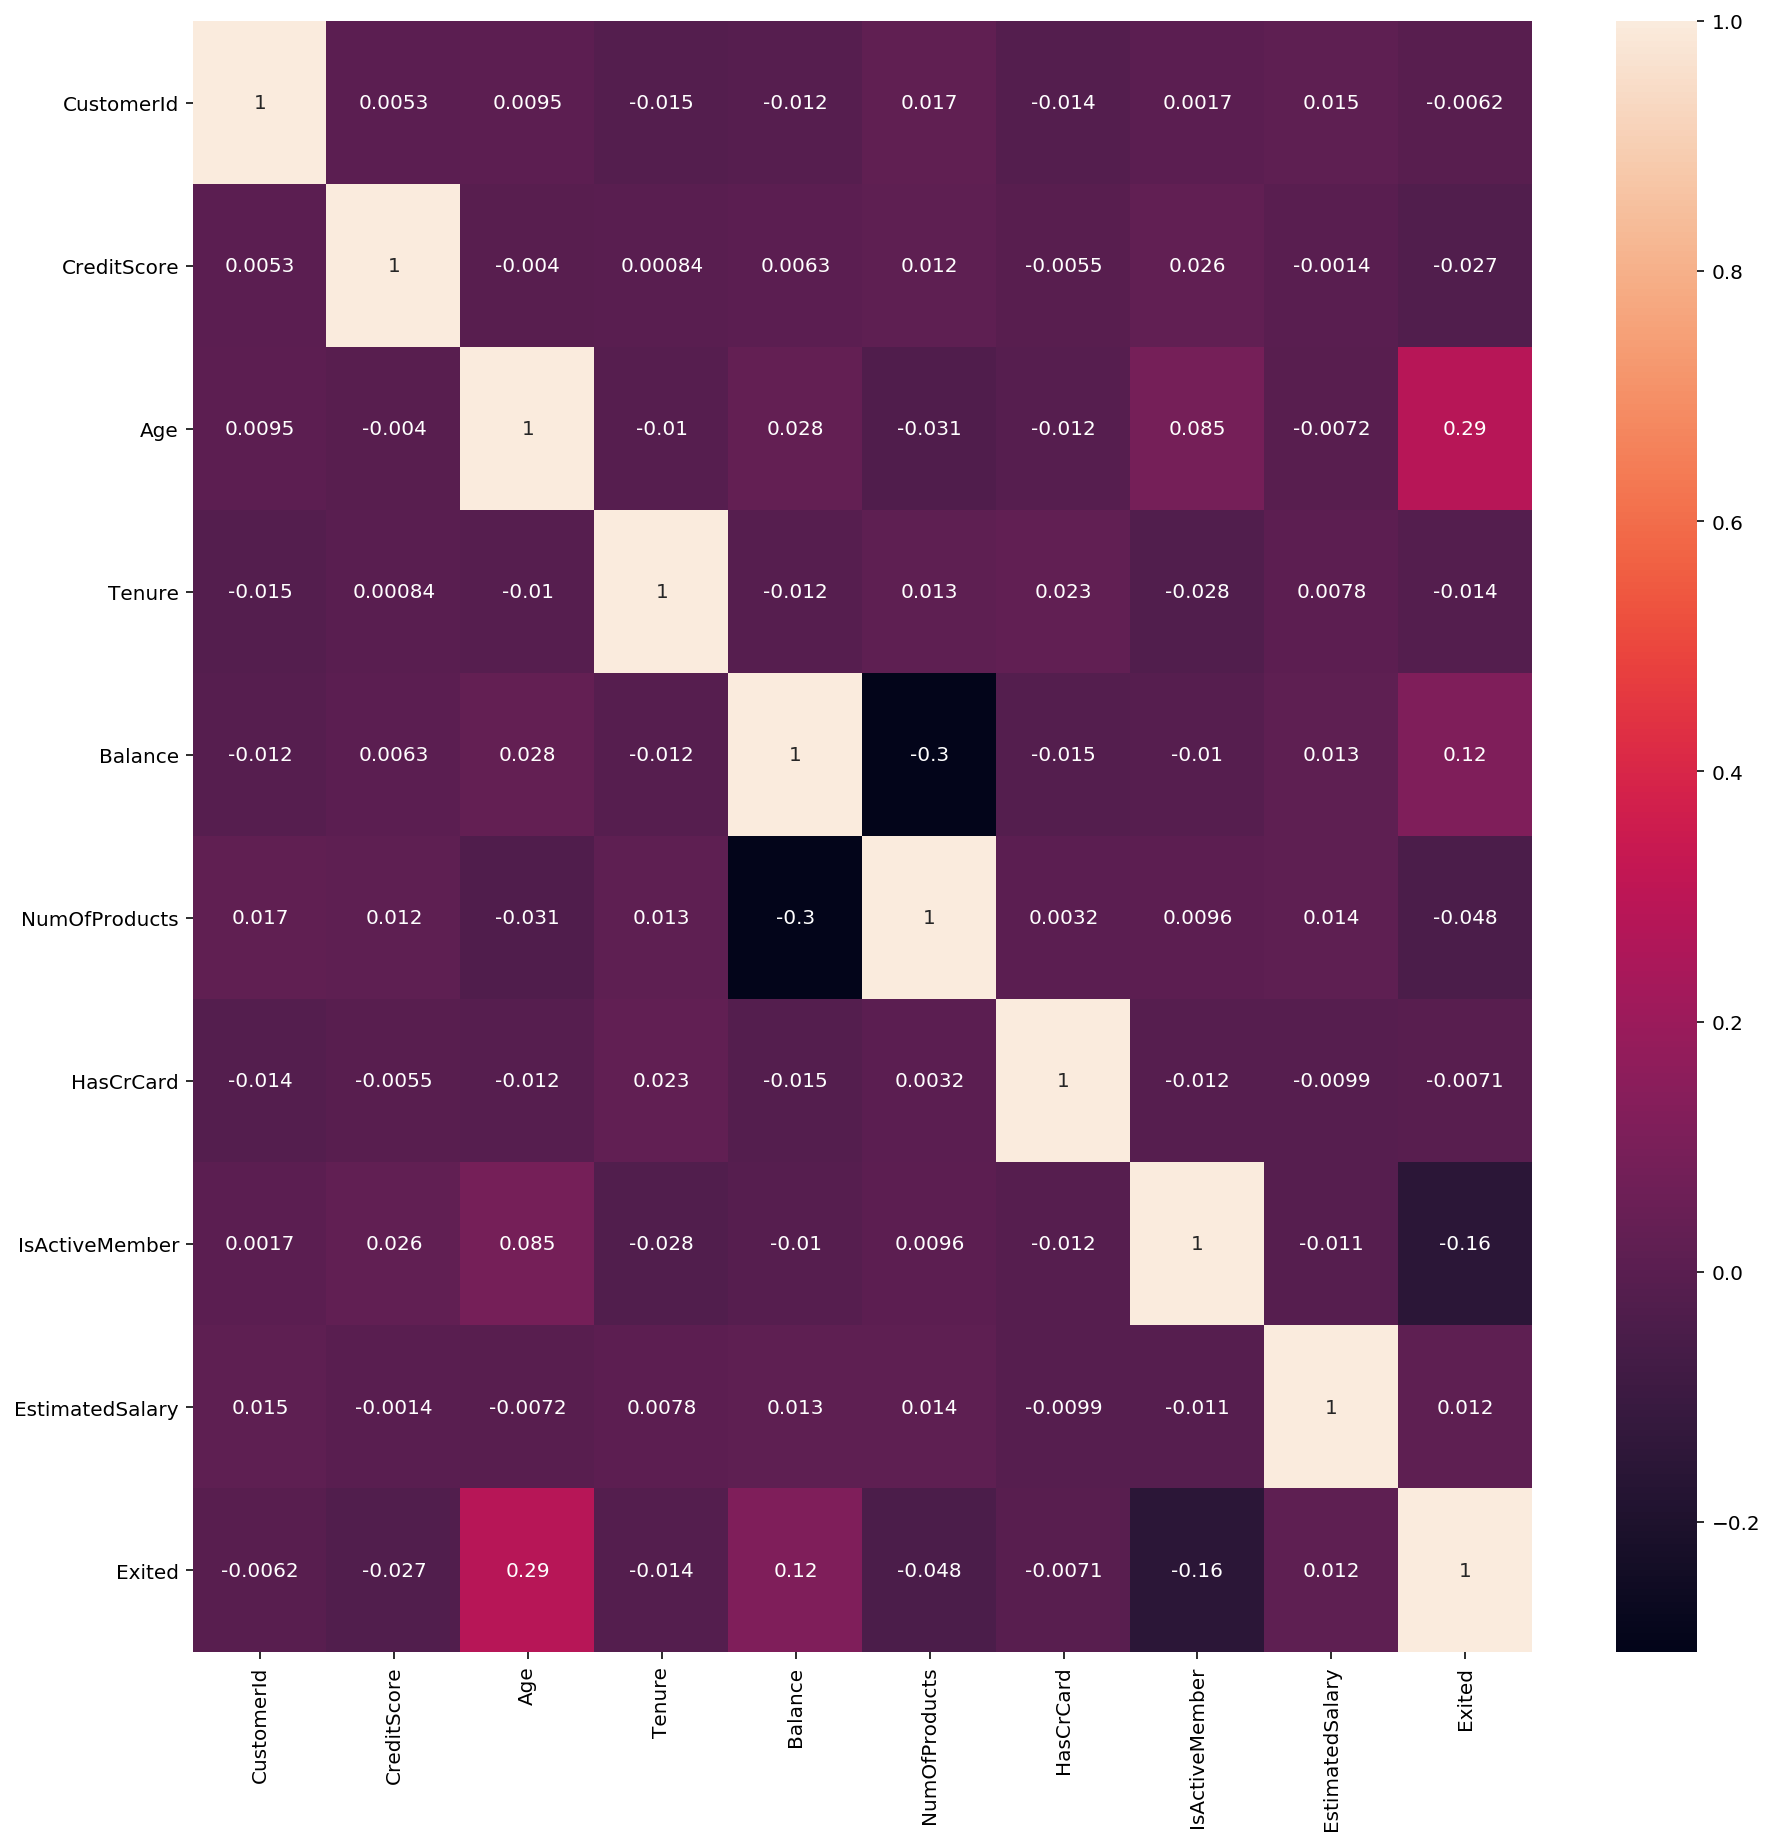

In [37]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()
 

In [38]:
 
df.Surname= pd.Categorical(df.Surname)
df.Geography = pd.Categorical(df.Geography)
df.Gender = pd.Categorical(df.Gender)

In [39]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [40]:
df = df.drop(["CustomerId","Surname"] ,axis=1)

In [41]:
num_features = df.select_dtypes(['int64',"float64"]).columns
for feature in num_features:
    
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

CreditScore no
Age no
Tenure no
Balance no
NumOfProducts yes
HasCrCard no
IsActiveMember no
EstimatedSalary no
Exited no


In [42]:
Q1 = df.NumOfProducts.quantile(0.05)
Q3 = df.NumOfProducts.quantile(0.95)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["NumOfProducts"] > upper,"NumOfProducts"] = upper

In [43]:
df1 = pd.get_dummies(df, columns = ["Gender"])

In [44]:
df2 = pd.get_dummies(df1, columns = ["Geography"])

In [45]:
y = df2["Exited"]
X = df2.drop(["Exited"], axis = 1)

In [46]:
scaled_cols=StandardScaler().fit_transform(X)
scaled_cols=pd.DataFrame(scaled_cols, columns=X.columns)
scaled_cols.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,-0.326221,0.293517,-1.041760,-1.225848,-0.924827,0.646092,0.970243,0.021886,1.095988,-1.095988,0.997204,-0.578736,-0.573809
1,-0.440036,0.198164,-1.387538,0.117350,-0.924827,-1.547768,0.970243,0.216534,1.095988,-1.095988,-1.002804,-0.578736,1.742740
2,-1.536794,0.293517,1.032908,1.333053,2.583620,0.646092,-1.030670,0.240687,1.095988,-1.095988,0.997204,-0.578736,-0.573809
3,0.501521,0.007457,-1.387538,-1.225848,0.829397,-1.547768,-1.030670,-0.108918,1.095988,-1.095988,0.997204,-0.578736,-0.573809
4,2.063884,0.388871,-1.041760,0.785728,-0.924827,0.646092,0.970243,-0.365276,1.095988,-1.095988,-1.002804,-0.578736,1.742740


LR: 0.813500 (0.021116)
KNN: 0.826500 (0.017255)
CART: 0.788000 (0.010265)
RF: 0.865375 (0.014780)
SVM: 0.854500 (0.011979)


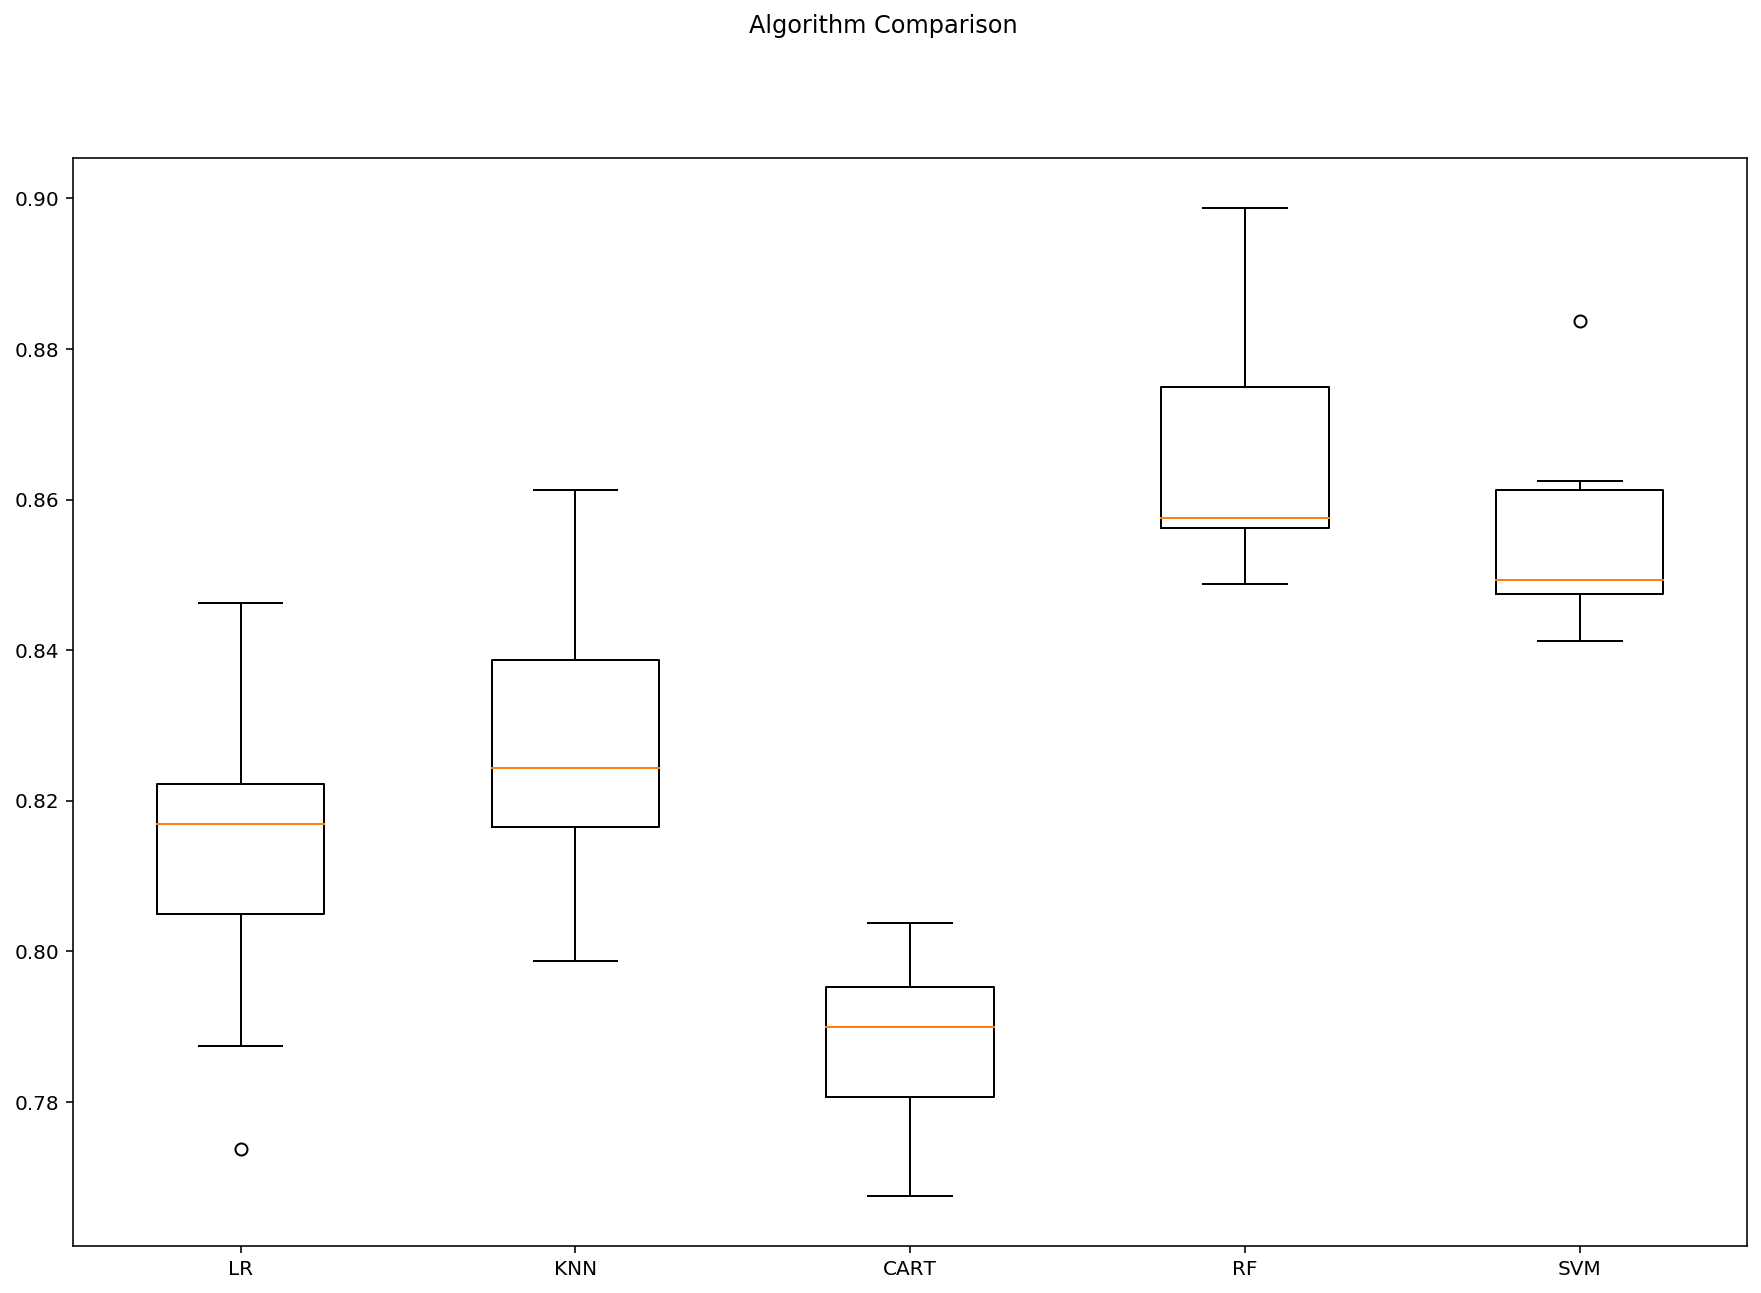

In [47]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))

X_train, X_test, y_train, y_test = train_test_split(scaled_cols, y, test_size=0.20, random_state = 12345)

# evaluate each model in turn
results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 123456)
        cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()